In [1]:
import pandas as pd

# 1/ Loading data

In [2]:
data = pd.read_csv("DATA/grocery_dataset_df.csv")

In [3]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: float64(143), int64(26)
memory usage: 12.7 MB
None


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN
1,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN
2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN
3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN
4,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN


# 2/ Cleaning data

In [4]:
# replace all NaN with Os
data = data.fillna(0).astype("int64")
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 3/ Exploring data

## 3.1 Amount of items purchased on each transaction

In [5]:
amount_each_transaction = data.sum(axis=1)
print(amount_each_transaction[0:5])

0    4
1    3
2    1
3    4
4    4
dtype: int64


## 3.2 Features (purchased items) - Top lists:

Total purchased items = 43367


,item_name,item_count,item_frac,cumsum_frac
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725


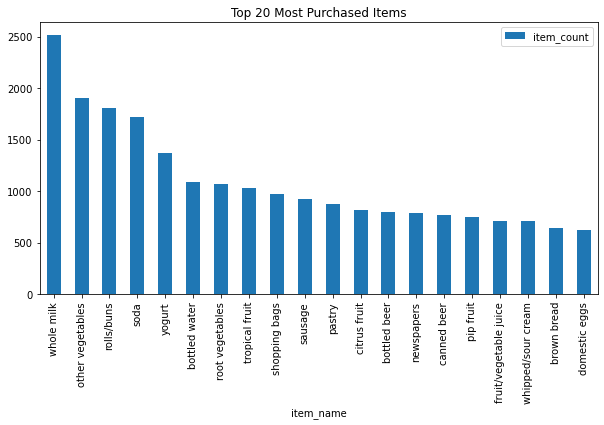

In [6]:
import matplotlib.pyplot as plt

# summary table ( sorted by "count") of all items:
item_summary = data.sum().sort_values(ascending=False).reset_index()
item_summary.rename(columns={"index":"item_name",0:"item_count"},inplace=True)
total_item_count = item_summary.item_count.sum()        # total amount of all purchased items
item_summary["item_frac"]= item_summary.item_count/total_item_count
item_summary["cumsum_frac"] = item_summary.item_frac.cumsum()

print(f"Total purchased items = {total_item_count}")

# top 5 most purchased items
display(item_summary.head())

# plot top 20 most purchased items
item_summary.head(20).plot(x="item_name", y="item_count",kind='bar', figsize=(10,5),title="Top 20 Most Purchased Items")

# 4/ Association Data-Mining: FP Growth Algorithm 

## 4.1 Prepare a desired subset for the algorithm: 
- It will contain just the items we are interested (i.e, the items contribute 40% to the total sales)
- It will hold all transactions with at least 2 purchased items.

In [7]:
# summary table of first items that contributes 40% to the total sales
summary_c40 =  item_summary[item_summary.cumsum_frac <= 0.4]
display(summary_c40)
# list of the features (items) whose purchased amounts contribute 40% to the total sales
features_c40 = list(summary_c40.item_name)

,item_name,item_count,item_frac,cumsum_frac
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [8]:
# subset dataframe that contains all transactions, but with just the items (i.e, 13) we are interested
data_c40_all_rows = data[features_c40]
data_c40_all_rows['Amount'] = data_c40_all_rows.sum(axis=1)

# subset that contains the transactions just with ast least 2 items
data_c40 = data_c40_all_rows[data_c40_all_rows['Amount'] >1][features_c40]
data_c40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4585 entries, 1 to 9834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   whole milk        4585 non-null   int64
 1   other vegetables  4585 non-null   int64
 2   rolls/buns        4585 non-null   int64
 3   soda              4585 non-null   int64
 4   yogurt            4585 non-null   int64
 5   bottled water     4585 non-null   int64
 6   root vegetables   4585 non-null   int64
 7   tropical fruit    4585 non-null   int64
 8   shopping bags     4585 non-null   int64
 9   sausage           4585 non-null   int64
 10  pastry            4585 non-null   int64
 11  citrus fruit      4585 non-null   int64
 12  bottled beer      4585 non-null   int64
dtypes: int64(13)
memory usage: 501.5 KB


/Users/DuyUyen/opt/anaconda3/envs/duy_051120/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- Now, there are only 13 items responsible for 40% of sales and 4585 transactions that have those items along with other items

## 4.2/ Set up Orange table

In [9]:
from Orange.data import Domain,Table,DiscreteVariable
from orangecontrib.associate.fpgrowth import *

# set up Orange tables
domain_data_c40 = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in features_c40])
org_data_c40 = Table.from_numpy(domain=domain_data_c40, 
                                X=data_c40.to_numpy(),
                                Y= None)
org_data_c40_en, mapping = OneHot.encode(org_data_c40, include_class=False)

## 4.3/ Set up the Rule

In [24]:
min_support = 0.01
num_trans = int(data_c40.shape[0] * min_support)
itemsets = dict(frequent_itemsets(org_data_c40_en,min_support=min_support))
print(f"Number of required transactions = {num_trans}")
len(itemsets)


Number of required transactions = 45


166886

In [32]:
confidence = 0.3
rules_df = pd.DataFrame()

rules = [(P, Q, supp, conf) for P, Q, supp, conf in association_rules(itemsets, confidence) if len(Q) == 1 ]

names = {item: f"{var.name} {val}" for item, var, val in OneHot.decode(mapping, org_data_c40, mapping)}

eligible_ante = [v for k,v in names.items() if v.endswith("1")]

N = data_c40.shape[0]

rule_stats = list(rules_stats(rules, itemsets, N))

rule_list_df = []
for ex_rule_frm_rule_stat in rule_stats:
    ante = ex_rule_frm_rule_stat[0]            
    cons = ex_rule_frm_rule_stat[1]
    named_cons = names[next(iter(cons))]
    if named_cons in eligible_ante:
        rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
        ante_rule = ', '.join(rule_lhs)
        if ante_rule and len(rule_lhs)>1 :
            rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                         'confidence' : ex_rule_frm_rule_stat[3],
                         'coverage' : ex_rule_frm_rule_stat[4],
                         'strength' : ex_rule_frm_rule_stat[5],
                         'lift' : ex_rule_frm_rule_stat[6],
                         'leverage' : ex_rule_frm_rule_stat[7],
                         'antecedent': ante_rule,
                         'consequent':named_cons[:-2] }
            rule_list_df.append(rule_dict)
rules_df = pd.DataFrame(rule_list_df)

print(f"Raw rules data frame of {rules_df.shape[0]} rules generated")
if not rules_df.empty:
    pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
else:
    print("Unable to generate any rule")


Raw rules data frame of 16628 rules generated


### Sorting rules in our Grocery Dataset

In [33]:
pruned_rules_df[['antecedent','consequent','support','confidence','lift']].groupby('consequent')\
    .max().reset_index()\
    .sort_values(['lift', 'support','confidence'],ascending=False)

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, tropical fruit",228,0.463636,2.230611
5,sausage,"shopping bags, rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt, root vegetables",92,0.429907,2.156588
1,citrus fruit,"whole milk, other vegetables, tropical fruit",66,0.333333,2.125637
10,yogurt,"whole milk, tropical fruit",199,0.484211,1.891061
2,other vegetables,"yogurt, whole milk, tropical fruit",228,0.643836,1.826724
6,shopping bags,"soda, sausage",50,0.304878,1.782992
0,bottled water,"yogurt, soda",59,0.333333,1.707635
9,whole milk,"yogurt, tropical fruit",228,0.754098,1.703222
3,rolls/buns,"yogurt, tropical fruit",97,0.522222,1.679095


In [40]:
pruned_rules_df[pruned_rules_df['lift']>1.0].sort_values(['lift', 'support','confidence'],ascending=False).head(10)

,antecedent,consequent,support,confidence,coverage,strength,lift,leverage
197,"whole milk, other vegetables, tropical fruit",root vegetables,69,0.463636,0.036641,8.906542,2.230611,0.007433
88,"rolls/buns, shopping bags",sausage,55,0.393162,0.033588,7.000000,2.201037,0.005996
189,"whole milk, other vegetables, citrus fruit",root vegetables,57,0.450450,0.027917,9.076190,2.167172,0.006629
231,"whole milk, yogurt, root vegetables",tropical fruit,46,0.429907,0.023337,8.542056,2.156588,0.005381
55,"other vegetables, tropical fruit",citrus fruit,66,0.333333,0.047328,5.210145,2.125637,0.006973
190,"whole milk, other vegetables, citrus fruit",tropical fruit,49,0.414414,0.027917,8.234234,2.078873,0.005207
217,"whole milk, root vegetables, yogurt",tropical fruit,56,0.411765,0.031189,7.745763,2.065581,0.005996
234,"whole milk, yogurt, tropical fruit",root vegetables,56,0.422018,0.032497,8.743119,2.030382,0.005459
140,"shopping bags, rolls/buns",sausage,59,0.361702,0.041876,5.978102,2.024914,0.006136
227,"whole milk, tropical fruit, yogurt",root vegetables,49,0.415254,0.025736,8.076271,1.997839,0.005338


In [41]:
pruned_rules_df_1 = pruned_rules_df[0:10]
pruned_rules_df_1

,antecedent,consequent,support,confidence,coverage,strength,lift,leverage
0,"bottled beer, bottled water",soda,50,0.322581,0.033806,8.834483,1.154592,0.001460
1,"bottled beer, bottled water",whole milk,60,0.475248,0.033806,20.505051,1.073404,0.000716
2,"bottled beer, other vegetables",whole milk,75,0.509615,0.034678,22.307692,1.151028,0.001517
3,"bottled beer, rolls/buns",whole milk,53,0.409449,0.029226,17.807018,0.924790,-0.000922
4,"bottled beer, whole milk",bottled water,55,0.317919,0.037732,5.524691,1.628669,0.004630
5,"bottled beer, whole milk",other vegetables,75,0.386740,0.043839,11.460993,1.097280,0.001354
6,"bottled beer, yogurt",whole milk,51,0.576471,0.019847,23.882353,1.302028,0.002479
7,"bottled water, bottled beer",whole milk,47,0.403509,0.027263,17.807018,0.911373,-0.000976
8,"bottled water, citrus fruit",other vegetables,50,0.377049,0.029008,13.245902,1.069784,0.000681
9,"bottled water, citrus fruit",whole milk,58,0.484848,0.029008,20.714286,1.095089,0.000909


In [46]:
final = pruned_rules_df[['antecedent','consequent','support','confidence','lift']].sort_values(['support','lift' ,'confidence'],ascending=False)
final[final['lift']>1.5]

,antecedent,consequent,support,confidence,lift
187,"whole milk, other vegetables",root vegetables,228,0.316017,1.520398
56,"other vegetables, tropical fruit",root vegetables,121,0.368132,1.771128
112,"root vegetables, tropical fruit",other vegetables,121,0.623077,1.767827
243,"yogurt, other vegetables",root vegetables,119,0.317757,1.528768
35,"other vegetables, citrus fruit",root vegetables,102,0.366906,1.765232
...,...,...,...,...,...
160,"soda, tropical fruit",yogurt,48,0.393443,1.536571
196,"whole milk, other vegetables, tropical fruit",citrus fruit,47,0.311258,1.984867
225,"whole milk, tropical fruit, citrus fruit",other vegetables,47,0.573171,1.626230
166,"tropical fruit, citrus fruit",root vegetables,47,0.317568,1.527857
